# College Basketball Data Analysis

**Name:** Brayden Uglione

**Date:** 12/10/24

**Exercise:** Milestone #4: Final Project

**Purpose:** This project analyzes a College Basketball Dataset to uncover insights related to team performance metrics, conference impacts, and trends in offensive efficiency.

## Data Cleaning (Copied from Part #3)

#### Import necessary libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import data

In [86]:
df1 = pd.read_csv('College Basketball Data/cbb14.csv')
df2 = pd.read_csv('College Basketball Data/cbb15.csv')
df3 = pd.read_csv('College Basketball Data/cbb16.csv')
df4 = pd.read_csv('College Basketball Data/cbb17.csv')
df5 = pd.read_csv('College Basketball Data/cbb18.csv')
df6 = pd.read_csv('College Basketball Data/cbb19.csv')
df7 = pd.read_csv('College Basketball Data/cbb20.csv')
df8 = pd.read_csv('College Basketball Data/cbb21.csv')
df9 = pd.read_csv('College Basketball Data/cbb22.csv')
df10 = pd.read_csv('College Basketball Data/cbb23.csv')

#### Get Rid of Necessary Columns
Removing several columns from each dataframe that are not relevant to the analysis questions to make it easier to focus only on metrics needed for the research questions.

List dataframe names and unneeded columns

In [87]:
# ChatGPT, response to "How to make a list of pandas dataframes", OpenAI, November 30, 2024.
df_names = [f'df{i}' for i in range(1, 11)]

unneeded_columns = ['EFG_O', 'EFG_D', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'POSTSEASON', 'SEED']

Loop through each dataframe while removing unnecessary columns and conferences

In [88]:
# ChatGPT, response to "How to remove certain columns in a list of pandas dataframes", OpenAI, November 30, 2024.
for df_name in df_names:
    df = globals()[df_name]
    
    df.drop(columns=unneeded_columns, errors='ignore', inplace=True)
    
    df = df[df['CONF'].str[0].str.isupper()]
    
    globals()[df_name] = df

Get rid of misc conference names

## Data Analysis

### Question 1: How does a college basketball team's conference affect its power rating?

Calculate average power rating for each conference

In [89]:
conf = df10.groupby('CONF')['BARTHAG'].mean().sort_values(ascending=False)

Plot power ratings for each conference

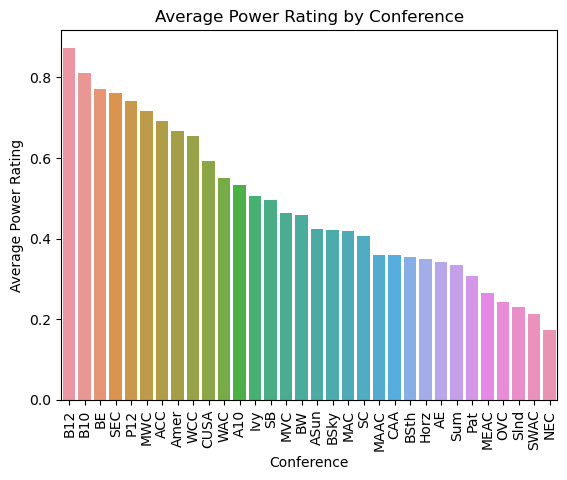

In [ ]:
# ChatGPT, response to "How to make a bar graph using seaborn in python", OpenAI, December 10, 2024.
sns.barplot(x=conf.index, y=conf.values)
plt.title('Average Power Rating by Conference')
plt.xlabel('Conference')
plt.ylabel('Average Power Rating')
# ChatGPT, response to "How to rotate x-axis labels in matplotlib", OpenAI, December 10, 2024.
plt.xticks(rotation=90)
plt.show()

The top three conferences were the Big 12, Big Ten, and Big East, with the Northeast coming in dead last.

### Question 2: How has offensive efficiency changed over the past decade?

Calculate average offensive efficiency for each year's dataframe

In [91]:
yearly_adjoe = {
    2014: df1['ADJOE'].mean(),
    2015: df2['ADJOE'].mean(),
    2016: df3['ADJOE'].mean(),
    2017: df4['ADJOE'].mean(),
    2018: df5['ADJOE'].mean(),
    2019: df6['ADJOE'].mean(),
    2020: df7['ADJOE'].mean(),
    2021: df8['ADJOE'].mean(),
    2022: df9['ADJOE'].mean(),
    2023: df10['ADJOE'].mean()
}

Convert to pandas series

In [92]:
# ChatGPT, response to "How to convert a dictionary into a pandas series", OpenAI, December 10, 2024.
yearly_adjoe_series = pd.Series(yearly_adjoe)

Plot data

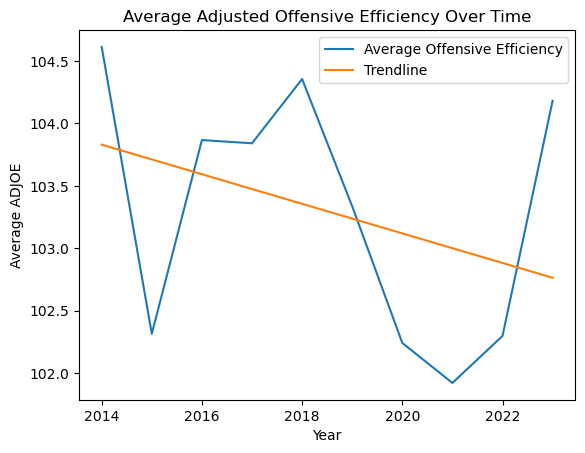

In [ ]:
# ChatGPT, response to "How to plot a trendline in a matplotlib plot", OpenAI, December 10, 2024.
# ChatGPT, response to "How to create a legend in a matplotlib plot", OpenAI, December 10, 2024.
plt.plot(yearly_adjoe_series.index, yearly_adjoe_series.values, label='Average Offensive Efficiency')
plt.title('Average Adjusted Offensive Efficiency Over Time')
plt.xlabel('Year')
plt.ylabel('Average ADJOE')

z = np.polyfit(yearly_adjoe_series.index, yearly_adjoe_series.values, 1)
p = np.poly1d(z)
plt.plot(yearly_adjoe_series.index, p(yearly_adjoe_series.index), label='Trendline')

plt.legend()
plt.show()

It appears that offensive efficiency has decreased over the last decade. However it has overall been very inconsistent. 